In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle

### COLOR CHART

In [4]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()

blues = mpl.colormaps["Blues"].resampled(10)
purples = mpl.colormaps["Purples"].resampled(22)
reds = mpl.colormaps["Reds"].resampled(10)
orange = mpl.colormaps["YlOrBr"].resampled(22)
spectrum = mpl.colormaps["viridis"].resampled(22)

In [5]:
c_blues = [blues(i) for i in range(10)]
c_purp = [purples(i) for i in range(22)]
c_red = [reds(i) for i in range(10)]
c_orag = [orange(i) for i in range(22)]
c_spec = [spectrum(i) for i in range(23)]

### Expectation value ouput

Parameter condition: Matrix size

In [6]:
size = [3]

Parameter condition: beta

In [10]:
#beta = [7.14,8.33,10,12.5,16.66,25,27.78,31.25,35.71,41.67,50,62.5] #standard beta condition
beta = [8.33,10]

Parameter condition: Alpha #1 (discrete alpha)

In [13]:
alp_arr = [0,0.05,0.1]
alp_index = 0

Parameter condition: Alpha #2 (continuous alpha)

In [16]:
alp = np.linspace(0,1,21)
alp_arr = []

for i in range(len(alp)):
    if i % 20 == 0:
        alp_arr.append(int(alp[i]))
    else:
        alp_arr.append(round(alp[i],2))

Parameter condition: Gamma #1 (discrete gamma)

In [8]:
gam = np.linspace(0,1,21)
gam_arr = []

for i in range(len(gam)):
    if i==0:
        gam_arr.append(0)
    elif i==20 or i ==10:
        gam_arr.append(int(gam[i]))
    else:
        gam_arr.append(round(gam[i],2))

Parameter condition: Gamma #2 (continuous gamma)

In [22]:
gam = np.linspace(0,1,21)
gam_arr = []
for i in range(len(gam)):
    if i % 20 == 0:
        gam_arr.append(int(gam[i]))
    else:
        gam_arr.append(round(gam[i],2))

Parameter check

In [23]:
print("gam_arr: ", gam_arr)
print("alp_arr: ", alp_arr)
print("beta: ",beta)
print("size: ",size)

gam_arr:  [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
alp_arr:  [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
beta:  [8.33, 10]
size:  [3]


In [13]:
#Gt.dat 파일을 행렬로 바꿔주는 함수
def read_matrix_from_file(filename,size):
    a = pd.read_csv(filename,header=None,delim_whitespace=True)
    b = []
    for i in range(len(a.columns)):
        b.append(a[i][len(a)-1])
    #with open(filename, 'r') as f:
        #data = f.read().split()
    return np.array([float(x) for x in b]).reshape(size, size)

#Cos 계산데이터를 행렬로 바꿔주는 함수 
def rread_matrix_from_file(filename,size):
    with open(filename, 'r') as f:
        data = f.read().split()
    return np.array([float(x) for x in data]).reshape(size, size)

def TOA_matrix_from_file(filename,size):
    dat = pd.read_csv(filename,header=None,delim_whitespace=True,skiprows=1)
    data = []
    for i in range(1,10,1):
        data.append(dat[i][600])
    return np.array([float(x) for x in data]).reshape(size, size)

def calculate_expectation_value(density_matrix, operator_matrix):
    return np.trace(np.dot(density_matrix, operator_matrix))

In [19]:
A = TOA_matrix_from_file('/home/way_ern/Programs/Github/run/TOA/20241220/standard/b8.33/data/Gt_g0.2_a0.95.dat',3)
O = rread_matrix_from_file('/home/way_ern/Programs/Github/run/ORDER_COS/data/COS_GAMMA_0.2_ALPHA_0.95_CUTOF_20_MODE_30000_SIZE_3.txt',size[0])

B=calculate_expectation_value(A,O)

/tmp/ipykernel_631656/201867834.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(filename,header=None,delim_whitespace=True,skiprows=1)


TOA

In [24]:
for k in range(len(beta)):
    for i in range(len(alp_arr)):
        globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]=[]
        for j in range(len(gam_arr)):
            density_matrix = TOA_matrix_from_file('/home/way_ern/Programs/Github/run/TOA/20241220/standard/b{}/data/Gt_g{}_a{}.dat'.format(beta[k],gam_arr[j],alp_arr[i]),size[0])
            operator_matrix = rread_matrix_from_file('/home/way_ern/Programs/Github/run/ORDER_COS/data/COS_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_SIZE_3.txt'.format(gam_arr[j],alp_arr[i]),size[0])

            expectation_value = calculate_expectation_value(density_matrix, operator_matrix)

            globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])].append(expectation_value)

        #df = np.column_stack((gam_arr,globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[k])]))
        #np.savetxt('./Expec/TOA/T_expec_s3_a{}_b{}.txt'.format(alp_arr[i],beta[k]),df)

/tmp/ipykernel_631656/201867834.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(filename,header=None,delim_whitespace=True,skiprows=1)
/tmp/ipykernel_631656/201867834.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(filename,header=None,delim_whitespace=True,skiprows=1)
/tmp/ipykernel_631656/201867834.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(filename,header=None,delim_whitespace=True,skiprows=1)
/tmp/ipykernel_631656/201867834.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(filename,header=None,delim_whit

DATA check
(_select alpha value range-discrete alpha #1- to plot data in cos-gamma plane_)

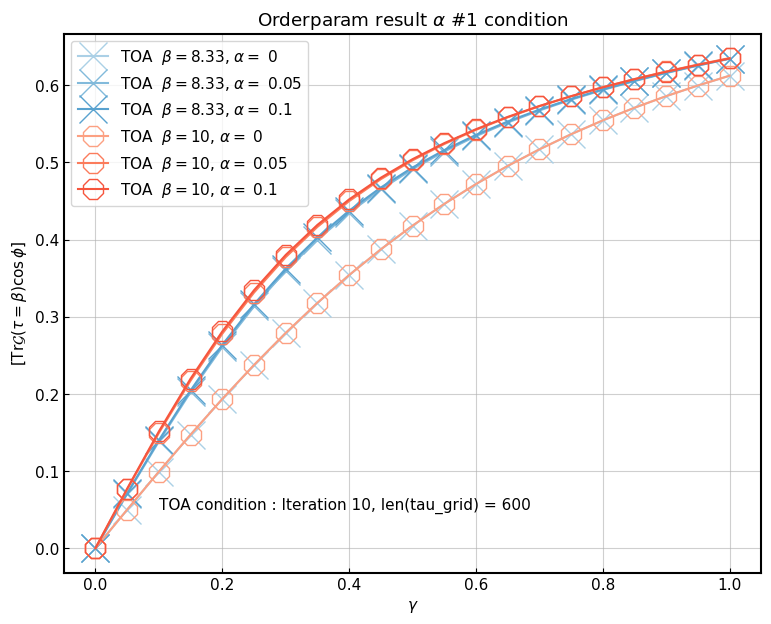

In [20]:
fig = plt.figure(figsize=(9,7))
mpl.rcParams['axes.linewidth'] = 1.5

plt.xlabel(r'$\gamma$')

plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')

plt.rcParams.update({'font.size': 11})

plt.title(r"Orderparam result $\alpha$ #1 condition")# in $\alpha$ = " + str(alp_arr[alp_index]))

plt.xlabel(r'$\gamma$')
plt.ylabel(r'[Tr$\mathcal{G}(\tau=\beta)\cos{\phi}$]')

# TOA_ block

for j in range(len(beta)):
    for i in range(len(alp_arr)):
        if j == 0:
            plt.plot(gam_arr,globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="TOA  " + r'$\beta = $' + str(beta[j]) + r", $\alpha = $ " + str(alp_arr[i]),color=c_blues[i+3],marker='x',markersize = 20, mfc= 'None')
        else:
            plt.plot(gam_arr,globals()['T_EXPEC_ALP{}_BET{}'.format(alp_arr[i],beta[j])],label="TOA  " + r'$\beta = $' + str(beta[j]) + r", $\alpha = $ " + str(alp_arr[i]),color=c_red[i+3],marker='8',markersize = 15, mfc= 'None')

#plt.text(0.9,0.25,'TOA condition : Iteration 4, len(tau_grid) = 401')
plt.text(0.1,0.05,'TOA condition : Iteration 10, len(tau_grid) = 600')
plt.grid(alpha=0.6)
plt.legend()
plt.show()
#plt.savefig("/Users/e2_602_qma/Documents/ACTIVATING/Plotimg/20241009_Orderparameter/sO_a0_lowtemp.pdf",format='pdf',bbox_inches='tight')

### Crossing point output

Parameter setting: beta

In [32]:
plta = [10,12.5]#,12.5]
#plta = [10,12.5]

_alpha #2 update required_

In [24]:
for k in range(len(plta)-1):
    for j in range(len(gam_arr)): 
        globals()['bet{}_GAM{}'.format(plta[k+1],j)]=[]
        for i in range(len(alp_arr)):
            
            lowtemp = TOA_matrix_from_file('/home/way_ern/Programs/Github/run/TOA/20241220/standard/b{}/data/Gt_g{}_a{}.dat'.format(plta[k],gam_arr[j],alp_arr[i]),size[0])
            hightemp = TOA_matrix_from_file('/home/way_ern/Programs/Github/run/TOA/20241220/standard/b{}/data/Gt_g{}_a{}.dat'.format(plta[k+1],gam_arr[j],alp_arr[i]),size[0])

            operator_matrix = rread_matrix_from_file('/home/way_ern/Programs/Github/run/ORDER_COS/data/COS_GAMMA_{}_ALPHA_{}_CUTOF_20_MODE_30000_SIZE_3.txt'.format(gam_arr[j],alp_arr[i],size[0]),size[0])
            
            lowexp = calculate_expectation_value(lowtemp, operator_matrix)
            highexp = calculate_expectation_value(hightemp, operator_matrix)

            diff = lowexp-highexp

            #print("gamma: ",j,", value: ",diff)

            globals()['bet{}_GAM{}'.format(plta[k+1],j)].append(diff)
        #print(globals()['bet{}_GAM{}'.format(plta[k+1],j)])
        df = np.column_stack((alp_arr,globals()['bet{}_GAM{}'.format(plta[k+1],j)]))
        np.savetxt('./Difference/TOA/T_diff_s3_g{}_lb{}.txt'.format(gam_arr[j],plta[k+1]),df)

/tmp/ipykernel_637021/201867834.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(filename,header=None,delim_whitespace=True,skiprows=1)
/tmp/ipykernel_637021/201867834.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(filename,header=None,delim_whitespace=True,skiprows=1)
/tmp/ipykernel_637021/201867834.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(filename,header=None,delim_whitespace=True,skiprows=1)
/tmp/ipykernel_637021/201867834.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(filename,header=None,delim_whit

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

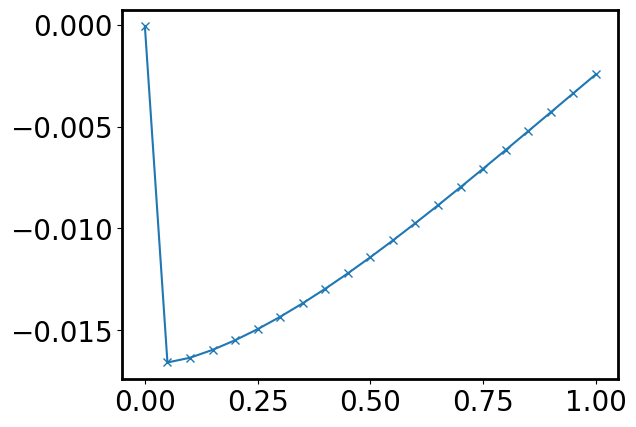

In [117]:
plt.plot(alp_arr,bet10_GAM7,marker='x')

3D plot data

In [33]:
for k in range(len(plta)-1):
    g_dom = []
    alp_dom = []
    for i in range(len(gam_arr)):
        globals()["filename{}".format(i)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[i],plta[k+1]),header=None,delim_whitespace=True)
        
        for j in range(0,len(filename0[1])-2,1): #인덱스 1부터 시작. 0인 경우 이상한 값들이 튀어서 그거 방지용으로 1부터 시작함. 
            if np.sign(globals()["filename{}".format(i)][1][j+1]) != np.sign(globals()["filename{}".format(i)][1][j+2]):
                if np.sign(globals()["filename{}".format(i)][1][j+1]) != 0:
                    g_dom.append(gam_arr[i])
                    alp_dom.append(alp_arr[j+1])

    globals()['tdplt{}'.format(int(plta[k]))] = []

    for n in range(len(alp_dom)):
        b = [alp_dom[n],g_dom[n],plta[k]]
        globals()['tdplt{}'.format(int(plta[k]))].append(b)

    df = np.column_stack((alp_dom,g_dom))
    np.savetxt('./Difference/TOA/3Dplt_s3_lb{}.txt'.format(plta[k+1]),df)

/tmp/ipykernel_637021/1004382342.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(i)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[i],plta[k+1]),header=None,delim_whitespace=True)
/tmp/ipykernel_637021/1004382342.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(i)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[i],plta[k+1]),header=None,delim_whitespace=True)
/tmp/ipykernel_637021/1004382342.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  globals()["filename{}".format(i)] = pd.read_csv("./Difference/TOA/T_diff_s3_g{}_lb{}.txt".format(gam_arr[i],plta[k+1]),header=None,delim_whites